In [1]:
import pandas as pd 
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SUNACTIVITY 데이터를 샘플로 사용해서 파이프라인 테스트합니다.

In [3]:
import statsmodels.api as sm
print(sm.datasets.sunspots.NOTE)
data = sm.datasets.sunspots.load_pandas().data

data.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
data.index.freq = data.index.inferred_freq
del data["YEAR"]
data.tail()

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



,SUNACTIVITY
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5
2008-12-31,2.9


In [4]:
# rolling mean을 넣어서 멀티 채널 (변수가 여러개)로 데이터 만들기
m_data = data.copy()
m_data["rolling_mean"] = data["SUNACTIVITY"].rolling(11).mean()
m_data = m_data.dropna()

<Axes: >

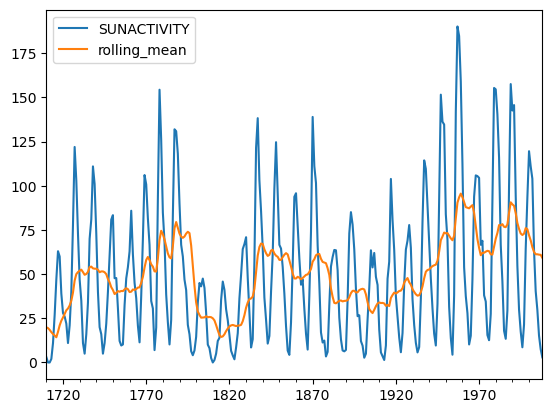

In [5]:
m_data.plot()

In [6]:
window = 9
prediction = 1
test_length = 20

train = m_data[:-test_length] # 1700~1988    #### 여기를 꼭 Series로 넣어야 하나?
test = m_data[-test_length:] # 1989~2008

In [7]:
test

,SUNACTIVITY,rolling_mean
1989-12-31,157.6,90.663636
1990-12-31,142.6,89.500000
1991-12-31,145.7,88.690909
1992-12-31,94.3,84.500000
1993-12-31,54.6,78.927273
1994-12-31,29.9,75.590909
1995-12-31,17.5,73.009091
1996-12-31,8.6,72.163636
1997-12-31,21.5,72.900000
1998-12-31,64.3,76.072727


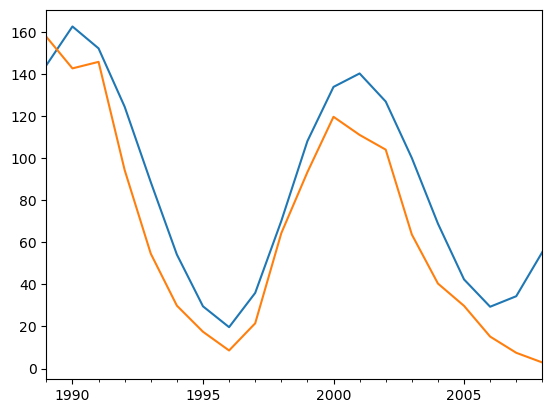

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
tgt = "SUNACTIVITY"
trn_ds = train[tgt]
tst_ds = test[tgt]
trn_ds.index.freq = trn_ds.index.inferred_freq
tst_ds.index.freq = tst_ds.index.inferred_freq
model = SARIMAX(trn_ds, order = (9,0,0), 
                seasonal_order= (0,0,0,0))
pred = model.fit(disp=False).forecast(len(tst_ds))

# Plot
pred.plot();
tst_ds.plot(label="real");

In [16]:
trn_ds.index

DatetimeIndex(['1710-12-31', '1711-12-31', '1712-12-31', '1713-12-31',
               '1714-12-31', '1715-12-31', '1716-12-31', '1717-12-31',
               '1718-12-31', '1719-12-31',
               ...
               '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
               '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
               '1987-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=279, freq='A-DEC')

In [12]:
tst_ds

1710-12-31      3.0
1711-12-31      0.0
1712-12-31      0.0
1713-12-31      2.0
1714-12-31     11.0
              ...  
1984-12-31     45.9
1985-12-31     17.9
1986-12-31     13.4
1987-12-31     29.4
1988-12-31    100.2
Freq: A-DEC, Name: SUNACTIVITY, Length: 279, dtype: float64

In [8]:
# CSV 파일로 내보내기
train.to_csv('../data/tester/train.csv')
test.to_csv('../data/tester/test.csv')

In [41]:
check_tst = pd.read_csv('../data/tester/test.csv', index_col = 0)
check_trn = pd.read_csv('../data/tester/train.csv', index_col = 0)

check_tst.index = pd.to_datetime(check_tst.index)
check_trn.index = pd.to_datetime(check_trn.index)

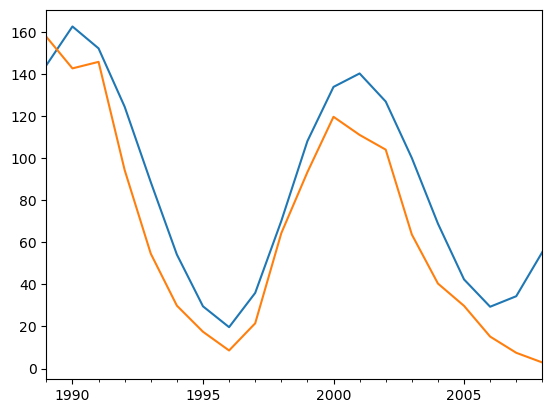

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
tgt = "SUNACTIVITY"
trn_ds = check_trn[tgt]
tst_ds = check_tst[tgt]

trn_ds.index.freq = trn_ds.index.inferred_freq
tst_ds.index.freq = tst_ds.index.inferred_freq
model = SARIMAX(trn_ds, order = (9,0,0), 
                seasonal_order= (0,0,0,0))
pred = model.fit(disp=False).forecast(len(tst_ds))

# Plot
pred.plot();
tst_ds.plot(label="real");

In [40]:
trn_ds

1989-12-31    157.6
1990-12-31    142.6
1991-12-31    145.7
1992-12-31     94.3
1993-12-31     54.6
1994-12-31     29.9
1995-12-31     17.5
1996-12-31      8.6
1997-12-31     21.5
1998-12-31     64.3
1999-12-31     93.3
2000-12-31    119.6
2001-12-31    111.0
2002-12-31    104.0
2003-12-31     63.7
2004-12-31     40.4
2005-12-31     29.8
2006-12-31     15.2
2007-12-31      7.5
2008-12-31      2.9
Freq: A-DEC, Name: SUNACTIVITY, dtype: float64